# Import Libraries

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report ,accuracy_score
from sklearn.preprocessing import StandardScaler ,LabelEncoder ,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Read Data 

In [48]:
train_data = pd.read_csv('customer_churn_dataset-training-master.csv')
test_data =pd.read_csv('customer_churn_dataset-testing-master.csv')

# EDA

In [49]:
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [50]:
test_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


## Check Bias in the target column for train and test data 

In [51]:
train_data['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [52]:
test_data['Churn'].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

In [53]:
## Check Nulls
train_data.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [54]:
# Drop the nulls
train_data=train_data.dropna()

In [55]:
train_data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [56]:
test_data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [57]:
## Check duplicates for train data
train_data.duplicated().sum()

0

In [58]:
## Check Duplicates for test Data
test_data.duplicated().sum()

0

In [59]:
train_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

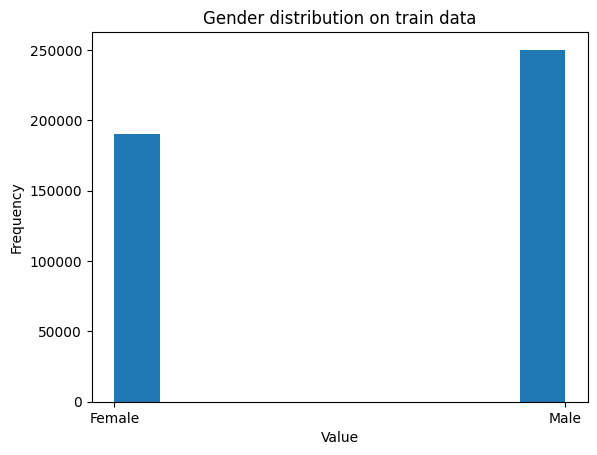

In [60]:
## Distribution of Gender
plt.hist(x=train_data['Gender'])
plt.title("Gender distribution on train data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show

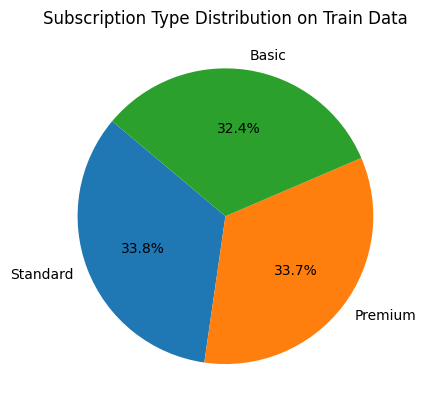

In [61]:
# Count the occurrences of each Subscription Type
subscription_counts = train_data['Subscription Type'].value_counts()

# Create the pie chart
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Subscription Type Distribution on Train Data")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

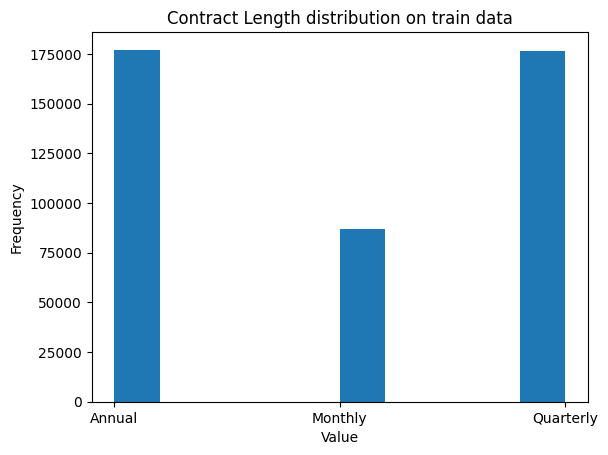

In [62]:
## Distrubtion of the length of the Contract
plt.hist(x=train_data['Contract Length'])
plt.title("Contract Length distribution on train data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

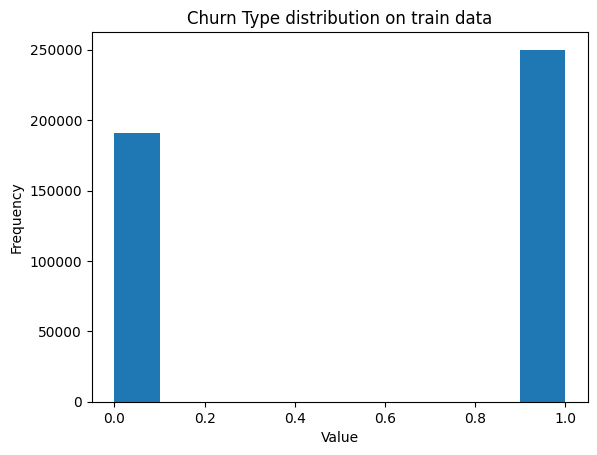

In [63]:
# Distribution of Churn
plt.hist(x=train_data['Churn'])
plt.title("Churn Type distribution on train data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show

In [64]:
## Divide the data into Numeric and Categorial Columns
numeric_columns =['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']
categorial_columns = ['Gender','Subscription Type','Contract Length']

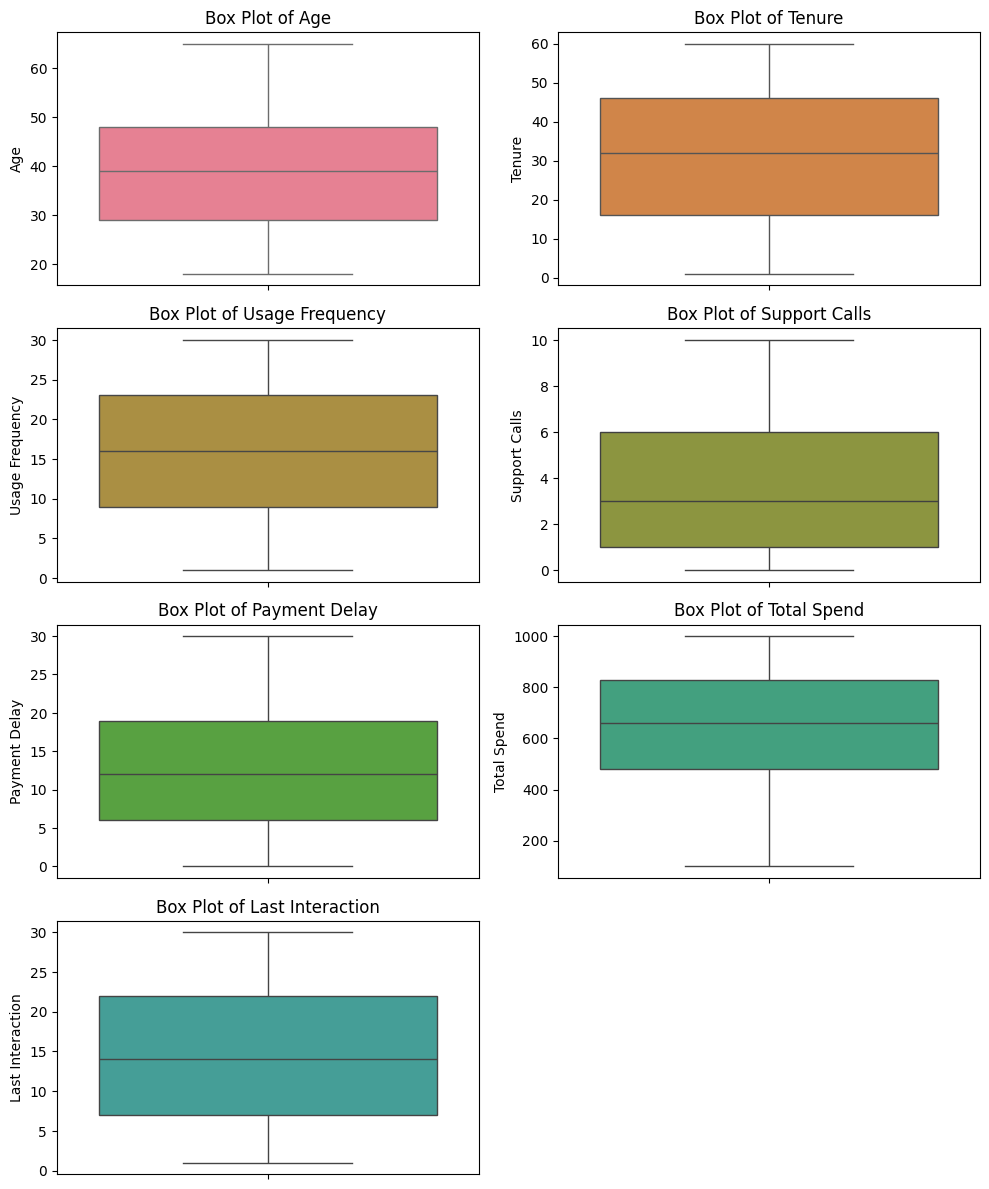

In [65]:
# Set up the figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()  # Make it easier to index

# Plot each boxplot for checking outliers
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=train_data[col], ax=axes[i], color=sns.color_palette("husl", 12)[i])
    axes[i].set_title(f"Box Plot of {col}")

# Remove empty plots if columns < 12
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

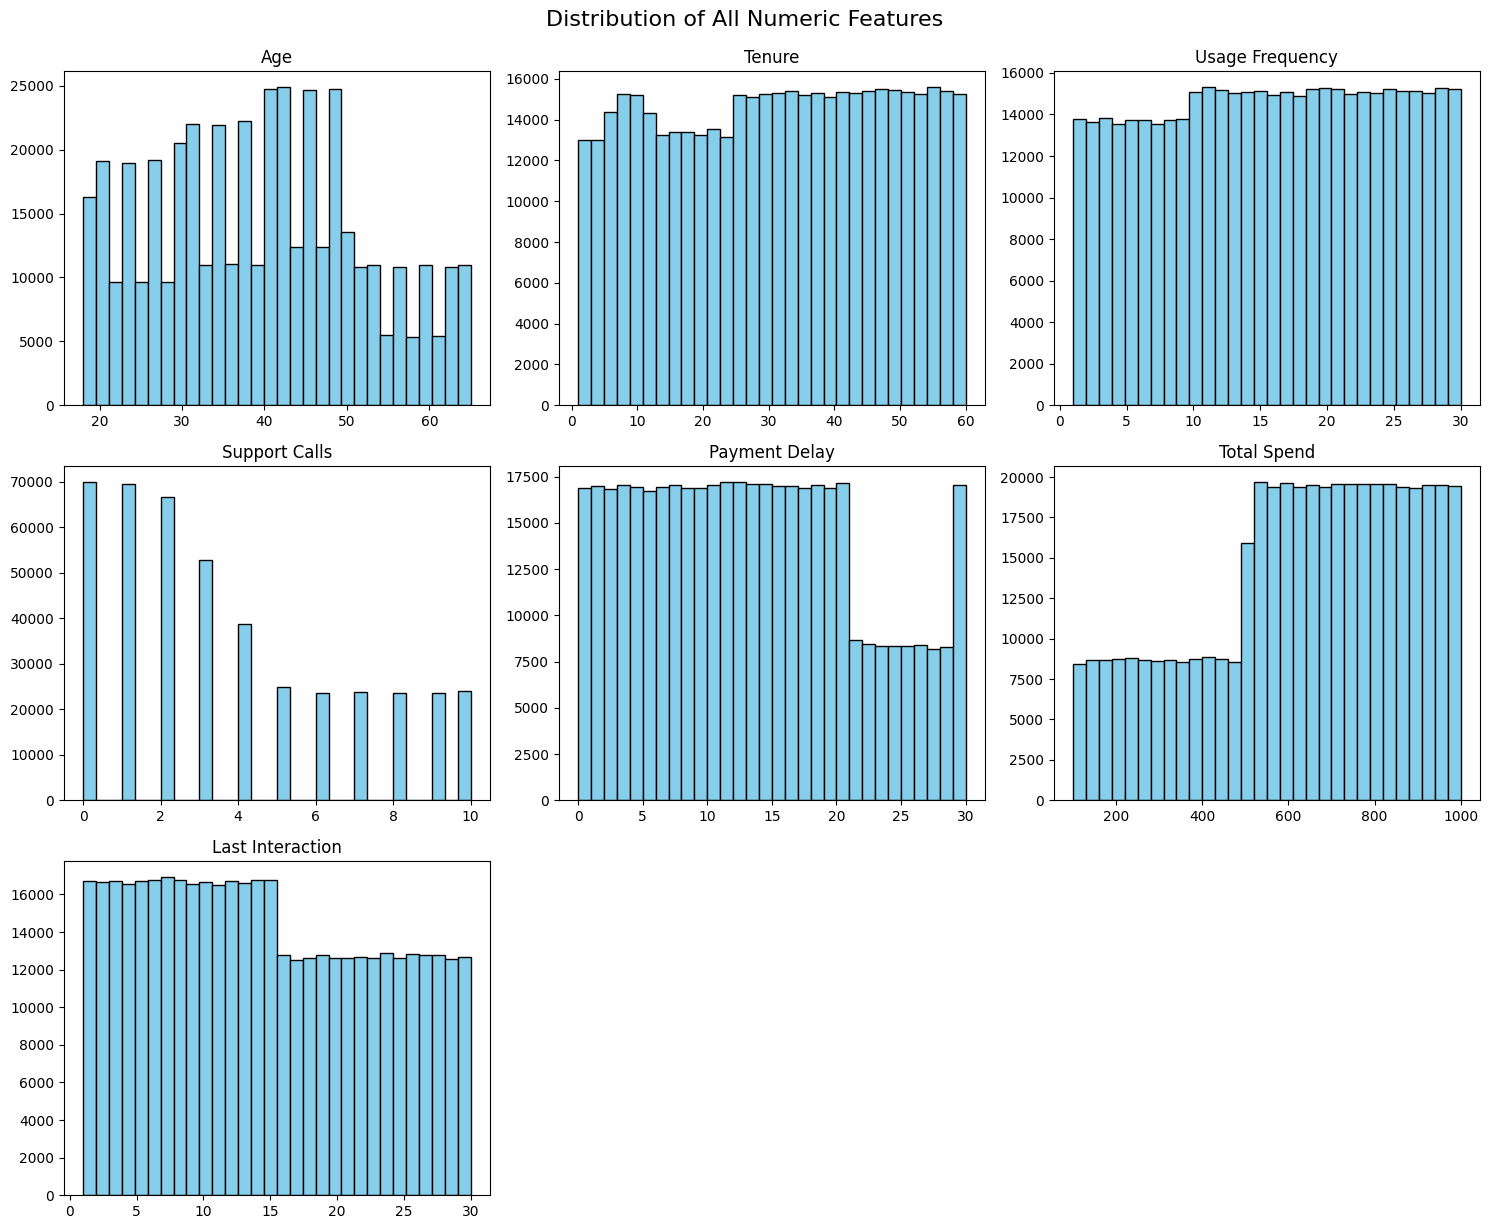

In [66]:
## See the distribution of the data


# Set up the plot grid
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(train_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Distribution of All Numeric Features", fontsize=16, y=1.02)
plt.show()

# Preprocessing

In [67]:
## Drop customer id column in train data
train_data.drop(columns=['CustomerID'],axis=1 ,inplace=True) 

In [68]:
## Drop customer id column in test data
test_data.drop(columns=['CustomerID'],axis=1 ,inplace=True)

In [69]:
## Reupdate the numeric columns list
numeric_columns =['Age','Support Calls','Payment Delay','Total Spend','Last Interaction']

scalar =StandardScaler()
encoder =LabelEncoder()
## Divide the data into train and test 
X_train = train_data.drop("Churn", axis=1)
y_train = train_data["Churn"]

X_test = test_data.drop("Churn", axis=1)  
y_test = test_data["Churn"]

## One Hot Encoding the categorial Features
X_train = pd.get_dummies(X_train,columns=categorial_columns)
X_test = pd.get_dummies(X_test,columns=categorial_columns)

## Scale the numeric Columns
X_train[numeric_columns] = scalar.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scalar.transform(X_test[numeric_columns])


In [70]:
## See the data after scaling
train_data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Building Diffrent models

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=10000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.2f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, model.predict(X_test))) 

Logistic Regression: 0.58
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.21      0.35     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.58     64374
   macro avg       0.74      0.60      0.52     64374
weighted avg       0.75      0.58      0.51     64374

KNN: 0.58
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.23      0.37     33881
           1       0.53      0.96      0.68     30493

    accuracy                           0.58     64374
   macro avg       0.70      0.60      0.53     64374
weighted avg       0.71      0.58      0.52     64374

Decision Tree: 0.50
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy    

### The **Naive base** model is the most model with accuracy

### Visualize the Diffrence Between Diffrence between the test and train data to know why the accuracy is low

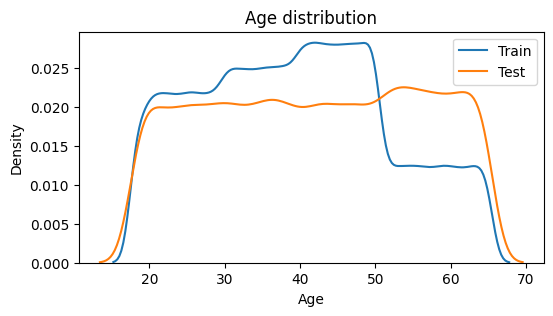

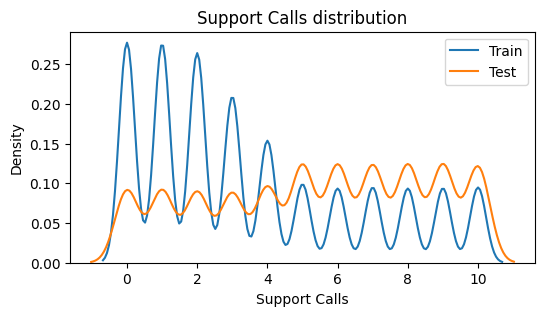

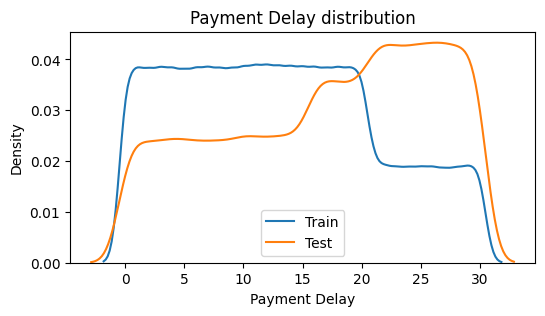

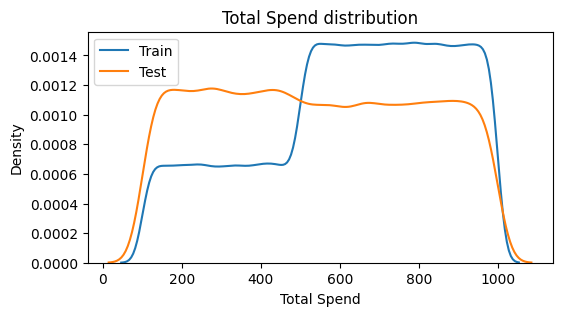

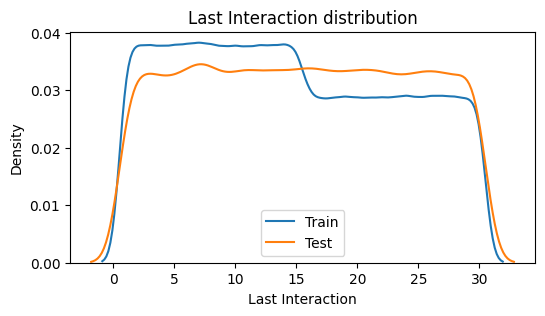

In [72]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.kdeplot(train_data[col], label="Train")
    sns.kdeplot(test_data[col], label="Test")
    plt.title(f"{col} distribution")
    plt.legend()
    plt.show()

## VIsualize which is more important features in the model using random forest

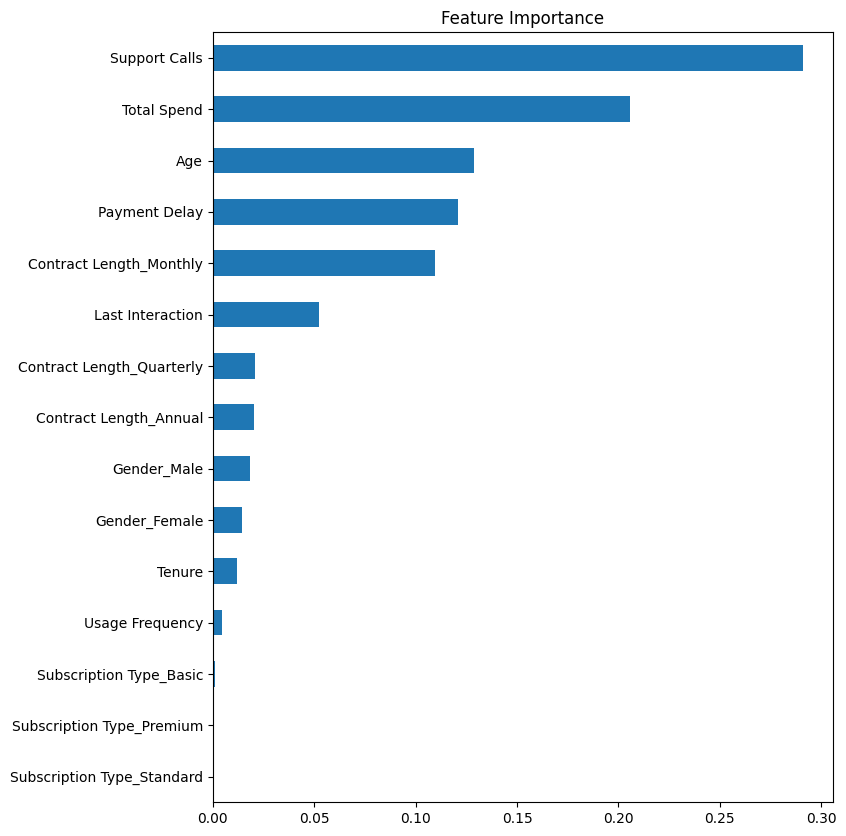

In [73]:

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
## Extract the importance of each feature
importances = pd.Series(RF_model.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(8,10))
plt.title("Feature Importance")
plt.show()


In [74]:
## See the Correlation with each feature and the target to identify less correlated features
X_train.corrwith(train_data['Churn']).round(2)

Age                           0.22
Tenure                       -0.05
Usage Frequency              -0.05
Support Calls                 0.57
Payment Delay                 0.31
Total Spend                  -0.43
Last Interaction              0.15
Gender_Female                 0.18
Gender_Male                  -0.18
Subscription Type_Basic       0.02
Subscription Type_Premium    -0.01
Subscription Type_Standard   -0.01
Contract Length_Annual       -0.18
Contract Length_Monthly       0.43
Contract Length_Quarterly    -0.18
dtype: float64

# While these features are less important than the others but because the information in the data is low the remove of these features is affecting the model negativly and lower the accuracy with the most useful model

In [75]:
# X_train.drop(columns=['Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium'
#                       ,'Subscription Type_Standard'],axis=1 ,inplace=True)

# X_test.drop(columns=['Tenure','Usage Frequency','Subscription Type_Basic','Subscription Type_Premium'
#                       ,'Subscription Type_Standard'],axis=1 ,inplace=True)

# tring working with the naive base model to get the highest accuracy

In [76]:
nb_model = GaussianNB ()
nb_model.fit(X_train,y_train)
acc = accuracy_score(y_test, nb_model.predict(X_test))
print (f"Acuuracy :{acc}")
print("Classification Report:\n", classification_report(y_test,  nb_model.predict(X_test))) 

Acuuracy :0.6302389163326809
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.43      0.55     33881
           1       0.57      0.85      0.69     30493

    accuracy                           0.63     64374
   macro avg       0.67      0.64      0.62     64374
weighted avg       0.67      0.63      0.61     64374



## Adjusting the threshold of the model

In [77]:
y_proba = nb_model.predict_proba(X_test)[:, 1]

# Tune threshold of y predict 
threshold = 0.3  
y_pred_thresh = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


Accuracy: 0.6318544754093267
              precision    recall  f1-score   support

           0       0.79      0.41      0.54     33881
           1       0.57      0.88      0.69     30493

    accuracy                           0.63     64374
   macro avg       0.68      0.64      0.62     64374
weighted avg       0.69      0.63      0.61     64374

